# Conducting T-Tests

## Introduction
Just as you previously used the t distribution to provide confidence intervals for estimating the population mean, you can also use similar methods to test whether two populations are different, statistically speaking. To do this, you can use a t-test.

## Objectives
You will be able to:

* Compare when you would use one sample vs. two sample t-tests
* Perform a one sample t-test and make conclusions about an experiment based on the results


## Hypothesis testing using the T-distribution

In frequentist hypothesis testing, you construct a test statistic from the measured data and use the value of that statistic to decide whether to accept or reject the null hypothesis. 
The test statistic is a lower-dimensional summary of the data but still maintains the discriminatory power necessary to make the decision whether or not to reject the null hypothesis.


## t-test
t-tests (also called Student’s t-test) are very practical hypothesis tests that can be employed to compare two averages (means) to assess if they are different from each other. You should run a t-test when you either:
* Don’t know the population standard deviation 
* You have a small sample size    

Like a $z$-test, the t-test also tells you how significant the differences are i.e. it lets you know if those differences could have happened by chance. In this lesson, you will get an introduction to t-tests, in particular, the 1-sample t-test. There are additional kinds of t-tests including the 2-sample t-test and paired t-test. This lesson will show you the mathematical calculations behind a 1-sample t-test as well as how to perform a t-test in Python using NumPy and SciPy. 

Detailed descriptions of hypothesis testing with t-tests can be found [here](http://www.mas.ncl.ac.uk/~njnsm/medfac/docs/ttest) and [here](http://blog.minitab.com/blog/adventures-in-statistics-2/understanding-t-tests-t-values-and-t-distributions)

### One Sample t-test

The 1-sample t-test is a statistical procedure used to determine whether a sample of observations could have been generated by a process with a specific mean. The one sample t-test compares the mean of your sample data to a known value. For example, you might want to know how your sample mean compares to the population mean.  Here is a quick example of a scenario where a 1-sample t-test could be applied. 

*Suppose you are interested in determining whether a bakery production line produces cakes with a weight of exactly 2 pounds. To test this hypothesis, you could collect a sample of cakes from the production line, measure their weights, and compare the sample with a value of 2 using a one-sample t-test.* 

### Two Sample t-tests

The two-sample t-test is used to determine if two population means are equal. The main types of two-sampled t-tests are paired and independent tests. Paired tests are useful for determining how different a sample is affected by a certain treatment. In other words, the individual items/people in the sample will **remain the same** and researchers are comparing how they change after treatment. Here is an example of a scenario where a two-sample paired t-test could be applied:

*The US Olympic weightlifting team is trying out a new workout techniques to in an attempt to improve everyone's powerlifting abilities. Did the program have an effect at a 95% significance level?*

Because we are looking at how specific individuals were affected by a treatment, we would use the paired t-test.

Independent two-sample t-tests are for when we are comparing two different, unrelated samples to one another. Unlike paired t-tests, we are not taking paired differences because there is no way to pair two unrelated samples! Here is an example of a scenario where a two-sample independent t-test could be applied:

*Agricultural scientists are trying to compare the difference in soybean yields in two different counties of Mississippi.*

You will learn more about the specifics of two sample t-tests in future lessons, but this lesson will focus on executing a one sample t-test.

### Assumptions for performing t-tests 

When performing various kinds of t-tests, you assume that the sample observations have numeric and continuous values. You also assume that the sample observations are independent from each other (that is, that you have a simple random sample) and that the samples have been drawn from normal distributions. You can visually inspect the distribution of your sample using a histogram, for example.

In the case of unpaired two-sample t-tests, you also assume that the populations the samples have been drawn from have the same variance. For paired two-sample t-tests, you assume that the _difference_ between the two sets of samples are normally distributed.  


#### Regardless of the type of t-test you are performing, there are 5 main steps to executing them:

1) Set up null and alternative hypotheses

2) Choose a significance level 

3) Calculate the test statistic

4) Determine the critical or p-value (find the rejection region)

5) Compare t-value with critical t-value to accept or reject the Null hypothesis.


Now, you're going to go through these 5 steps in more detail to complete a t-test.

Let's begin with a sample experiment:

### Sample question: 

>*"Acme Ltd. wants to improve sales performance. Past sales data indicate that the average sale was 100 dollars per transaction. After training the sales force, recent sales data (from a random sample of 25 salesmen) is shown below:"*

       
      [122.09, 100.64, 125.77, 120.32, 118.25,  
        96.47, 111.4 ,  80.66, 110.77, 111.14, 
        102.9, 114.54,  88.09,  98.59,  87.07, 
       110.43, 101.9 , 123.89,  97.03, 116.23, 
        108.3, 112.82, 119.57, 131.38, 128.39]

**Did the training work?**

Before completing the hypothesis test, let's calculate some summary statistics to see if the mean of the sample differed a substantial amount from the population. After, you can check to ensure that the data is relatively normal.


* **The population mean ($\mu$):** Given as 100 (from past data).
* **The sample mean ($\bar{x}$):** Calculate from the sample data
* **The sample standard deviation ($s$):** Calculate from sample data
* **Number of observations($n$):** 25 as given in the question. This can also be calculated from the sample data.
* **Degrees of Freedom($df$):** Calculate from the sample as df = total no. of observations - 1


In [1]:
## Import the packages
import numpy as np
from scipy import stats 
import math

# For visualizing distributions - optional 
import seaborn as sns
import matplotlib.pyplot as plt
sample = np.array([122.09, 100.64, 125.77, 120.32, 118.25,  96.47, 111.4 , 80.66,
       110.77, 111.14, 102.9 , 114.54,  88.09,  98.59,  87.07, 110.43,
       101.9 , 123.89,  97.03, 116.23, 108.3 , 112.82, 119.57, 131.38,
       128.39])


# Population mean (μ)
mu = 100 

# Sample mean (x̄) using NumPy mean()
x_bar = sample.mean()

# Sample Stadrad Deviation (sigma) using Numpy
sigma = np.std(sample,ddof=1)

# Sample size (n)
n = len(sample)

# Degrees of Freedom
df = n-1

# Difference in sample mean 
diff = x_bar - mu


# Print the findings
print ('The sample contains', n, 'observations, having a mean of', x_bar, "and a standard deviation (sigma) = ", sigma, 
       ", with", df, 'degrees of freedom. The difference between sample and population means is:', diff)


The sample contains 25 observations, having a mean of 109.5456 and a standard deviation (sigma) =  13.338774643871902 , with 24 degrees of freedom. The difference between sample and population means is: 9.545599999999993


The sample mean is $9.54 per sale higher than the population mean, which indicates that, at least superficially, the training program appears to have improved performance.

## Is the sample roughly normally distributed?


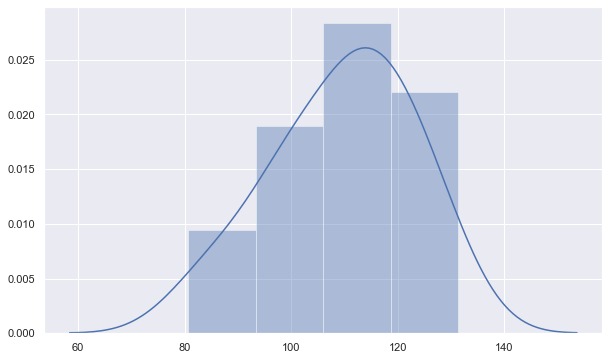

In [4]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(10,6)})
sns.distplot(sample);

In [13]:
import pandas as pd

In [ ]:
# Plot the sample data distibution using a Histogram

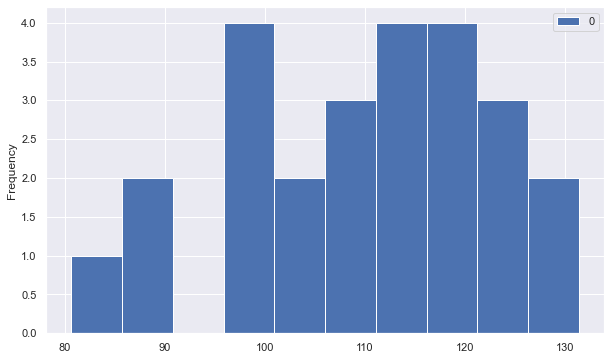

In [14]:
from matplotlib.pyplot import plot
pd.DataFrame(sample).plot.hist();

# qqplot

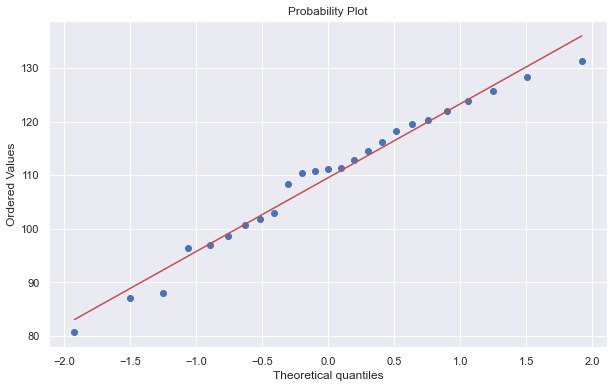

In [15]:
import pylab 
stats.probplot(sample, dist = "norm", plot = pylab)
pylab.show()

# Back to Business

### Step 1: Write your null and alternative hypothesis statements

As you are trying to monitor a change in the sales performance after the training, the null-hypothesis addresses the fact that there is no change and sales performance before and after the training is exactly the same. 

**$H_{0}$:** *The null hypothesis is that there is no difference in sales, so:*

> $H_{0}: \mu$ = $100.

    
This is the one that you are testing. Our alternate hypothesis should address the expected change in the sales performance i.e. the sales performance has increased and the mean of sales post-training is greater than 100. 

**$H_{1}$:** *The alternative hypothesis is that there is a change i.e. the mean sales increased.*

> $H_{1}: \mu$ > $100.


### Step 2: Choose a Significance Level (Alpha)


The significance level, also denoted as alpha or `α`, is the probability of rejecting the null hypothesis when it is true. For example, a significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference. Look at the following graphs for a better understanding: 


<img src="images/P05.png" alt="drawing" width="500px"/>
In the graph above, the two shaded areas are equidistant from the null hypothesis value and each area has a probability of 0.025, for a total of 0.05. In statistics, you call these shaded areas the critical regions for a two-tailed test. If the population mean is 260, you’d expect to obtain a sample mean that falls in the critical region 5% of the time. The critical region defines how far away our sample statistic must be from the null hypothesis value before you can say it is unusual enough to reject the null hypothesis.

Our sample mean (330.6) falls within the critical region, which indicates it is statistically significant at the 0.05 level.

You can also see if it is statistically significant using the other common significance level of 0.01.


<img src="images/P01.png" alt="drawing" width="500px"/>

The two shaded areas each have a probability of 0.005, the two of which add up to a total probability of 0.01. This time the sample mean does not fall within the critical region, and you fail to reject the null hypothesis. This comparison shows why you need to choose your significance level before you begin your study. It protects you from choosing a significance level because it conveniently gives you significant results!

Using the graph, data scientists are able to determine that their results are statistically significant at the 0.05 level without using a p-value. However, when you use the numeric output produced by statistical software, you’ll need to compare the p-value to your significance level to make this determination.

### **For Acme's experiment, you can assume an $\alpha$ of 0.05.**



### Step 3: Calculate the t-statistic

The sample looks like a nicely shaped normal distribution. After fulfilling the three requirements for a t-test mentioned above i.e. normality, independence, and randomness, we are ready to calculate our t statistic using the formula for one-sample t-test given as:

# $$t = \frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}}$$
 
> Using the formula given above, calculate the t-value in Python:

In [5]:
# Calculate Sigma
t = (x_bar -  mu)/(sigma/np.sqrt(n))
t

3.578139767278185

+ The sample generated a t-statistic of around 3.58. Where in the t-distribution is this located? Let's try visualizing the calculated t-statistic on top of a PDF.

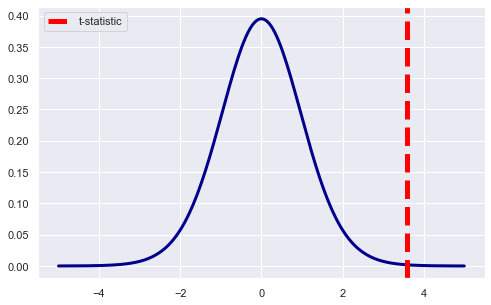

In [6]:
# generate points on the x axis between -5 and 5:
xs = np.linspace(-5, 5, 200)

# use stats.t.pdf to get values on the probability density function for the t-distribution
# the second argument is the degrees of freedom
ys = stats.t.pdf(xs, df, 0, 1)

# initialize a matplotlib "figure"
fig = plt.figure(figsize=(8,5))

# get the current "axis" out of the figure
ax = fig.gca()

# plot the lines using matplotlib's plot function:
ax.plot(xs, ys, linewidth=3, color='darkblue')

# plot a vertical line for our measured difference in rates t-statistic
ax.axvline(t, color='red', linestyle='--', lw=5,label='t-statistic')
ax.legend()
plt.show()

## Step 4: Calculate critical value (find rejection region)

Note that a positive t-value indicates that the sample mean is greater than the population mean and vice versa. This means that the sample's average sales performance post-training is greater than average population sales performance. 

This sounds like good news, **BUT** is the increase high enough to reject the null hypothesis and accept that there is a significant increase in the mean of post-training sales performance, or is it just by chance. It's possible to calculate a critical t-value with a t-table and also by using Python `scipy.stats` module.


The critical value approach involves determining "likely" or "unlikely", by determining whether or not the observed test statistic is more extreme than would be expected if the null hypothesis were true. This involves comparing the observed test statistic to some cutoff value, called the **"critical value"**. 
>If the test statistic is more extreme than the critical value, then the null hypothesis is rejected in favor of the alternative hypothesis. If the test statistic is not as extreme as the critical value, then the null hypothesis is not rejected.


You need two values to find this:

The **alpha level**: given as 5% in the question.

**Degrees of freedom**, which is the number of items in the sample (n) minus 1: 25 – 1 = 24.

![t-dist](images/t-dist.png)

You use a one-tailed t-test towards the positive (right side of the t-distribution) to identify an increase in the sales performance. 

Look up 24 degrees of freedom in the left column and a p-value of 0.05 (from 5% alpha level - 95% confidence level) in the top row. The intersection is `1.711`. This is our one-sample critical t-value.

For the Null hypothesis to be true, what this critical value means is that you would expect most values to fall under 1.711. If your calculated t-value (from Step 4) falls within this range, the null hypothesis is likely true and you would fail to reject the null hypothesis.

This value can also be calculated in Python using `scipy.stats` module using `ppf()` (Percent Point Function) as `scipy.stats.t.ppf(1-alpha, df)`. 

Let's calculate the critical t using this formula and confirm our earlier findings. 

In [7]:
# Calculate critical t-value
t_crit = np.round(stats.t.ppf(1 - 0.05, df=24),3)
t_crit

1.711

As you can see, the critical value returned from the function (rounded off 2 to two decimal places) is the same as the one you should have found in the t-distribution table i.e. 1.711. 

Using matplotlib, you can graph the rejection region as such. Any t-statistic that falls within the shaded region to the right will cause the hypothesis to be rejected.

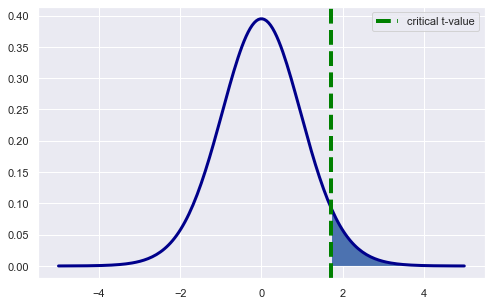

In [8]:
# generate points on the x axis between -5 and 5:
xs = np.linspace(-5, 5, 200)

# use stats.t.pdf to get values on the probability density function for the t-distribution
# the second argument is the degrees of freedom
ys = stats.t.pdf(xs, df, 0, 1)

# initialize a matplotlib "figure"
fig = plt.figure(figsize=(8,5))

# get the current "axis" out of the figure
ax = fig.gca()

# plot the lines using matplotlib's plot function:
ax.plot(xs, ys, linewidth=3, color='darkblue')


ax.axvline(t_crit,color='green',linestyle='--',lw=4,label='critical t-value')
ax.legend()
ax.fill_betweenx(ys,xs,t_crit,where= xs > t_crit)
plt.show()

### Step 5: Compare t-value with critical t-value to accept or reject the Null Hypothesis

Any t-value which is greater than 1.711 will fall into the shaded region in the above figure. t-values greater than 1.711 would reflect an "extreme" result and can be used to reject the null hypothesis. 

Your calculated t-value, known as the t-statistic is 3.65, which is greater than 1.711 and hence the results can be called "statistically significant" and will allow researchers to reject the null hypothesis and with 95% confidence state that: 

*We are 95% sure that the mean sales performance post training is higher than the population mean prior to training.*

**NOTE:** This calculation can also be performed using the `ttest_1samp`  function in `SciPy.stats` indicated here: 

>**scipy.stats.ttest_1samp(a, popmean, axis=0, nan_policy='propagate')**


Where a is the sample mean ($\bar{x}$) and popmean ($\mu$) is the population mean. This function returns the t-value and p-value for the sample. Here, you are using a one-tailed t-test as you are looking for an increase in sales performance.

In [9]:
results = stats.ttest_1samp(a= sample, popmean= mu)         
print ("The t-value for sample is", round(results[0], 2), "and the p-value is", np.round((results[1]), 4))

The t-value for sample is 3.58 and the p-value is 0.0015


+ You can use our null and alternate hypotheses defined earlier to state the results from our findings. 

In [10]:
if (results[0]>t_crit) and (results[1]<0.05):
    print ("Null hypothesis rejected. Results are statistically significant with t-value =", 
           round(results[0], 2), "and p-value =", np.round((results[1]), 4))
else:
    print ("Null hypothesis is Accepted")

Null hypothesis rejected. Results are statistically significant with t-value = 3.58 and p-value = 0.0015


+ It's also possible to visualize where the calculated t-statistic is compared to the critical t-value:

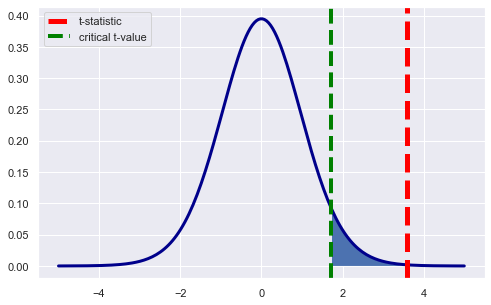

In [11]:
# generate points on the x axis between -5 and 5:
xs = np.linspace(-5, 5, 200)

# use stats.t.pdf to get values on the probability density function for the t-distribution
# the second argument is the degrees of freedom
ys = stats.t.pdf(xs, df, 0, 1)

# initialize a matplotlib "figure"
fig = plt.figure(figsize=(8,5))

# get the current "axis" out of the figure
ax = fig.gca()

# plot the lines using matplotlib's plot function:
ax.plot(xs, ys, linewidth=3, color='darkblue')

# plot a vertical line for our measured difference in rates t-statistic
ax.axvline(t, color='red', linestyle='--', lw=5,label='t-statistic')

ax.axvline(t_crit,color='green',linestyle='--',lw=4,label='critical t-value')
ax.fill_betweenx(ys,xs,t_crit,where= xs > t_crit)

ax.legend()
plt.show()

# One Sample T-test Exercises

### Exercise 1: 

Create a function in Python `one_sample_ttest(sample, popmean, alpha)` that will take in sample data (an array of observations), the population mean and the alpha value to calculate and print out the t-statistic, critical t-value, and p-value for the sample and identify if the results are significant or not. The function should also create a visualization using `seaborn` of the distribution to check for normality.

## Objectives
You will be able to:

* Perform a one sample t-test and make conclusions about an experiment based on the results


In [16]:
def one_sample_ttest(sample, popmean, alpha):

    # Visualize sample distribution for normality 
    sns.set(color_codes=True)
    sns.set(rc={'figure.figsize':(12,10)})
    sns.distplot(sample)
    
    # Population mean 
    mu = popmean
    
    # Sample mean (x̄) using NumPy mean()
    x_bar= sample.mean()

    # Sample Standard Deviation (sigma) using Numpy
    sigma = np.std(sample)
    
    # Degrees of freedom
    df = len(sample) - 1
    
    #Calculate the critical t-value
    t_crit = stats.t.ppf(1 - alpha, df=df)
    
    #Calculate the t-value and p-value
    results = stats.ttest_1samp(a= sample, popmean= mu)         
    
    if (results[0]>t_crit) and (results[1]<alpha):
        print ("Null hypothesis rejected. Results are statistically significant with t-value =", 
                round(results[0], 2), "critical t-value =", t_crit, "and p-value =", np.round((results[1]), 10))
    else:
        print ("Null hypothesis is True with t-value =", 
                round(results[0], 2), ", critical t-value =", t_crit, "and p-value =", np.round((results[1]), 10))
    

# Exercise 2:
+ Use the function created in Exercise 1 to answer the following analytical questions.

In a Python class, some of the students have taken online courses to improve their Python skills. The scores of a random sample of 20 students who underwent the online-course on a Python test are as follows:


     [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]
    
The mean score of the class before the test is 65. The teacher thinks that the online training has really helped the students and now they should perform better than the class (population) mean. Use this to set your null and alternative hypotheses.

1. Test to see if the sample mean is significantly different from 65 at the .05 level. Report the t- and p-values.
2. The researcher realizes that she accidentally recorded the score that should have been 80.9 as 90.9. Are these corrected scores significantly different from 65 at the .05 level?

Bonus: What is the effect size of the first sample compared to the population? How can you interpret this effect size in relation to your significance test?


### Solution:    

Null hypothesis rejected. Results are statistically significant with t-value = 12.69 critical t-value = 1.729132811521367 and p-value = 1e-10


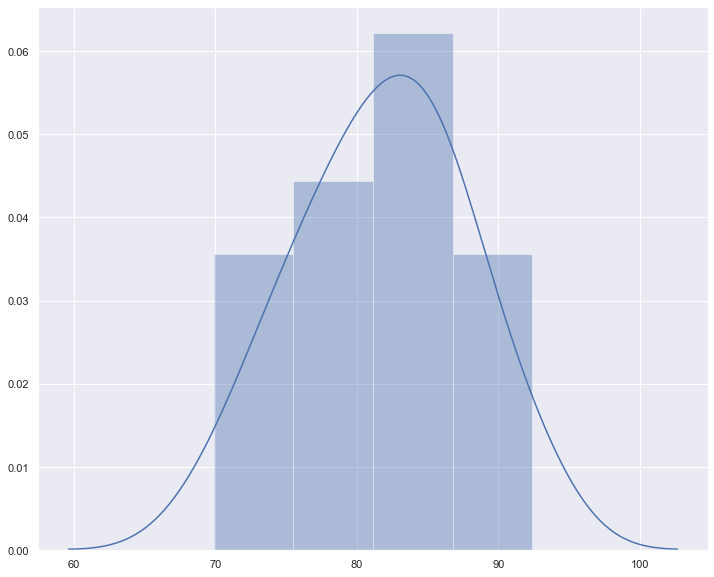

In [17]:
sample = np.array([84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3] )

popmean = 65
alpha = 0.05
one_sample_ttest(sample, popmean, alpha)

# Two Sample T-test Exercise

## Summary

In this lesson, you saw a quick introduction to hypothesis testing using frequentists methods with t-values and p-values. You saw how a one sample t-test can be applied to contexts where the population mean is unknown and you have a limited amount of sample data. You looked at all the stages required for such hypothesis testing with a description of steps and also, how to perform these steps in Python.